In [1]:
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../raw_data/df_energy_weather.csv", index_col=[0])

In [3]:
df.columns

Index(['Date', 'Code INSEE région', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'Stockage batterie', 'Déstockage batterie', 'Eolien terrestre',
       'Eolien offshore', 'TCO Thermique (%)', 'TCH Thermique (%)',
       'TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)',
       'TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)', 'Column 30',
       'YEAR', 'MONTH', 'DAY', 'T2M', 'T2MDEW', 'T2MWET', 'TS', 'T2M_RANGE',
       'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M',
       'WS50M'],
      dtype='object')

In [4]:
df = df[['Consommation (MW)','T2M', 'T2MDEW', 'T2MWET', 'TS', 'T2M_RANGE','T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M',
       'WS50M']]

In [5]:
df

,Consommation (MW),T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M
0,257058.278726,7.30,6.40,6.85,7.08,5.75,9.60,3.86,6.16,94.12,5.62,97.76,3.23,5.29
1,280064.000000,4.36,1.79,3.08,4.10,8.23,10.05,1.83,4.46,84.50,0.08,98.04,4.65,6.87
2,285526.000000,5.46,0.91,3.19,3.78,10.59,11.96,1.37,4.15,73.75,0.00,99.42,2.33,3.35
3,286799.000000,5.92,2.24,4.08,4.06,11.30,12.80,1.51,4.58,79.12,0.01,99.19,2.50,3.72
4,267848.000000,6.64,2.37,4.50,4.85,12.38,14.41,2.04,4.76,74.88,0.00,98.51,3.25,5.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,218296.000000,18.10,10.98,14.55,18.10,10.06,23.51,13.45,8.36,65.50,0.00,98.39,2.50,3.04
3413,209770.000000,18.13,10.08,14.11,18.05,10.38,23.49,13.11,7.81,61.56,0.00,98.51,2.45,3.00
3414,201061.000000,18.01,10.59,14.30,18.40,10.09,23.48,13.39,8.24,64.94,0.10,98.33,2.34,3.11
3415,194195.000000,19.47,14.94,17.20,20.69,13.58,26.39,12.80,10.93,77.94,0.83,98.08,2.03,2.70


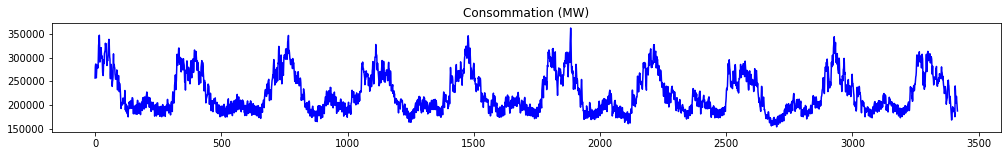

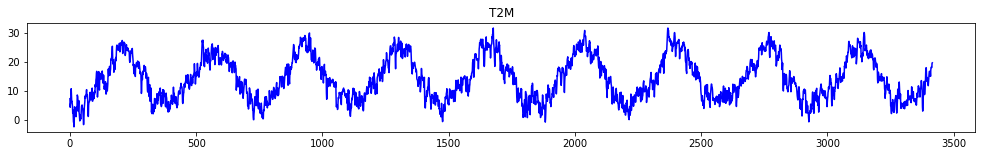

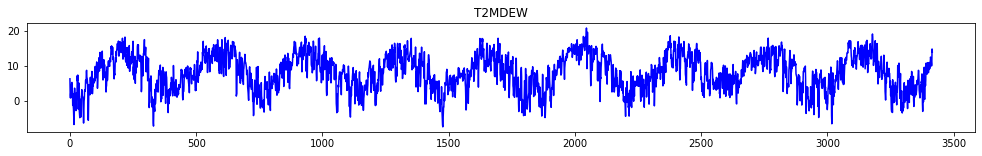

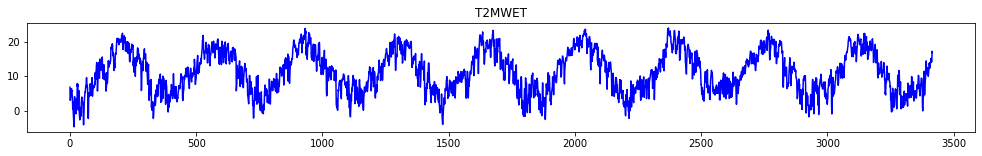

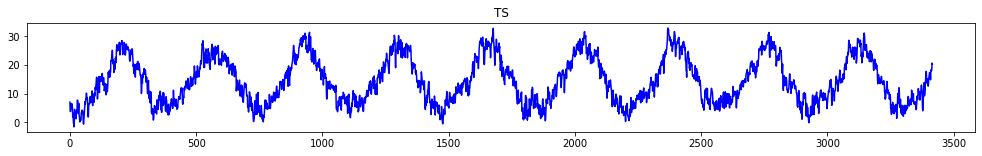

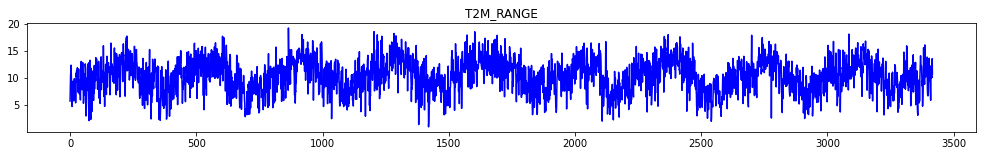

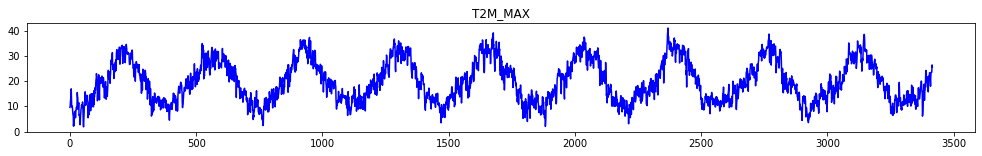

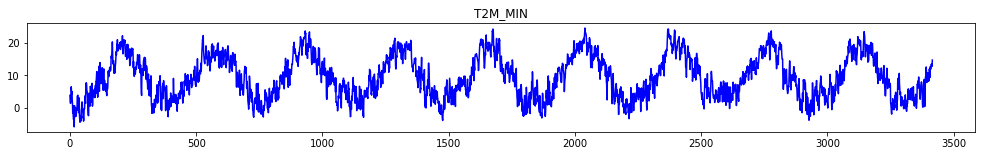

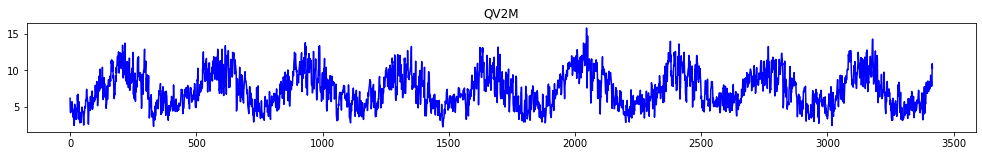

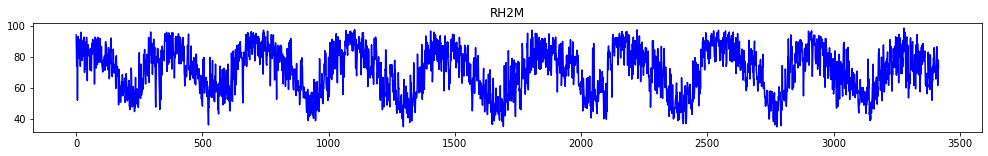

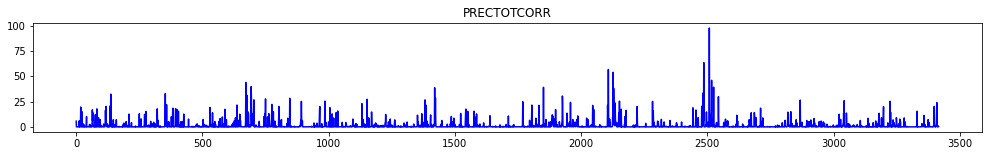

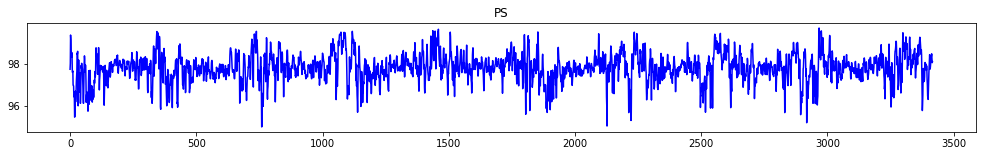

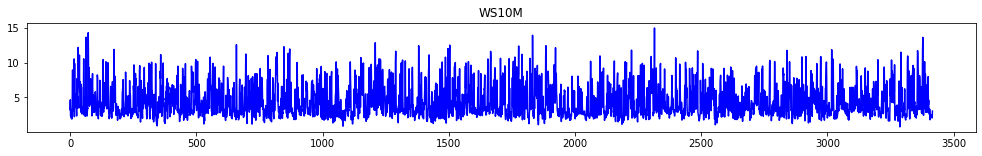

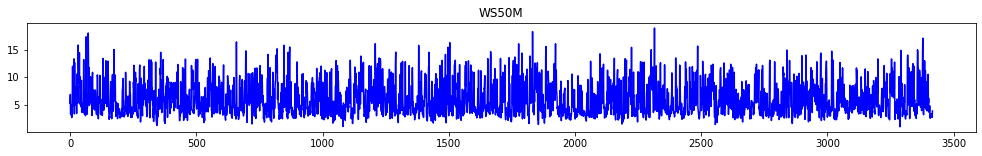

In [6]:
for col in df.columns:
    color="orange" if col == "pm2.5" else "blue"
    df[col].plot(figsize=(17, 2), color=color)
    plt.title(col)
    plt.show()

In [7]:
df.describe()

,Consommation (MW),T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M
count,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000
mean,224989.378858,14.253202,8.122754,11.188074,14.524317,10.367747,19.794987,9.427261,7.319426,71.201844,1.565154,97.835642,4.406810,6.025920
std,39697.681331,7.311808,5.014973,5.953364,7.914107,3.061490,8.090707,6.520734,2.393277,14.429963,4.832912,0.679410,2.306579,2.985773
min,153691.000000,-2.380000,-7.360000,-4.540000,-1.550000,0.980000,1.900000,-5.880000,2.200000,34.690000,0.000000,94.970000,0.740000,0.980000
25%,194272.000000,8.190000,4.560000,6.510000,7.940000,8.270000,13.100000,3.980000,5.430000,59.750000,0.000000,97.490000,2.690000,3.700000
50%,210106.000000,13.560000,8.320000,10.940000,13.530000,10.540000,18.800000,8.760000,7.080000,72.810000,0.050000,97.860000,3.590000,5.160000
75%,254321.000000,20.300000,11.980000,16.300000,21.150000,12.590000,26.450000,14.830000,9.030000,82.940000,0.640000,98.220000,5.690000,7.900000
max,362960.000000,31.590000,20.940000,23.900000,32.930000,19.250000,40.980000,24.620000,15.870000,98.620000,97.860000,99.760000,15.040000,18.970000


## Création des sequences X & y

In [8]:


def subsample_sequence(df, length):

    # $CHALLENGIFY_BEGIN
    last_possible = df.shape[0] - length
    
    random_start = np.random.randint(0, last_possible)
    df_sample = df[random_start: random_start+length]
    # $CHALLENGIFY_END
    return df_sample

In [9]:
# pourquoi pas:
# def split_subsample_sequence(df, length, "ecart", "lenght_y")
# df_subsample.iloc[length - "ecart" -  "lenght_y"]
# X_sample = df_subsample[0:length -"ecart" - "lenght_y"]


In [10]:
def split_subsample_sequence(df, length):
    '''Create one single random (X,y) pair'''
    # $CHALLENGIFY_BEGIN
    df_subsample = subsample_sequence(df, length)
    y_sample = df_subsample.iloc[length -1]['Consommation (MW)']
    
    X_sample = df_subsample[0:length -1]
    X_sample = X_sample.values
    # $CHALLENGIFY_END
    return np.array(X_sample), np.array(y_sample)

## Création de plusieurs sequences X & y

In [11]:
# pourquoi pas:
# def get_X_y(df, n_sequences, length, "ecart", , "lenght_y")
# (xi, yi) = split_subsample_sequence(df, length,"ecart" , "lenght_y")

In [12]:
def get_X_y(df, n_sequences, length):
    '''Return a list of samples (X, y)'''
    # $CHALLENGIFY_BEGIN
    X, y = [], []

    for i in range(n_sequences):
        (xi, yi) = split_subsample_sequence(df, length)
        X.append(xi)
        y.append(yi)
        
    X = np.array(X)
    y = np.array(y)
    # $CHALLENGIFY_END
    return X, y

In [16]:
X, y = get_X_y(df, 200, 21)
print(X.shape)
print(y.shape)

(200, 20, 14)
(200,)


In [19]:
#X[0]

# copie des trois fonction + ajout des écarts longueur y

In [44]:
def split_subsample_sequence(df, length_x, ecart , length_y ):
    '''Create one single random (X,y) pair'''
    # $CHALLENGIFY_BEGIN
    length = length_x + ecart + length_y
    df_subsample = subsample_sequence(df, length)
    y_sample = df_subsample.iloc[length_x + ecart:length]['Consommation (MW)']
    
    X_sample = df_subsample[0:length_x]
    X_sample = X_sample.values
    # $CHALLENGIFY_END
    return np.array(X_sample), np.array(y_sample)

In [45]:
def get_X_y(df, n_sequences, length_x, ecart , length_y):
    '''Return a list of samples (X, y)'''
    # $CHALLENGIFY_BEGIN
    
    
    X, y = [], []

    for i in range(n_sequences):
        (xi, yi) = split_subsample_sequence(df, length_x, ecart , length_y)
        X.append(xi)
        y.append(yi)
        
    X = np.array(X)
    y = np.array(y)
    # $CHALLENGIFY_END
    return X, y

In [46]:
X, y = get_X_y(df, 200, 25,5,5)
print(X.shape)
print(y.shape)

(200, 25, 14)
(200, 5)


In [ ]:
# ecart", , "lenght_y

In [20]:
len_ = int(0.8*df.shape[0])
df_train = df[:len_]
df_test = df[len_:]

In [21]:
X_train, y_train = get_X_y(df_train, 200, 21)
X_test, y_test = get_X_y(df_test, 40, 21)